In [2]:
"""
参考資料
http://miffysora.wikidot.com/python-xml
-> BasicなXMLのパースの仕方に関してはまとまっていた。
"""
import xml.etree.ElementTree as ET

In [5]:
tree = ET.parse('sample_xml/000456.xml')
root = tree.getroot()

In [6]:
print(root.find(".//name").text)
print(root.findtext(".//name"))  #これでも上と全く同じ結果になる

bus
bus


In [7]:
print(root.findtext(".//xmin"))
print(root.findtext(".//xmax"))
print(root.findtext(".//ymin"))
print(root.findtext(".//ymax"))

91
439
44
313


In [15]:
# 複数データの取得に関して
"""
参考資料
http://www.python-izm.com/contents/application/xmlparser.shtml
-> xml.dom.minidomの実行例に関してまとまっている
https://docs.python.jp/3/library/xml.dom.minidom.html
-> 上記例だけだと分からなかったので公式ドキュメントも参考にする
"""
import xml.dom.minidom

In [27]:
dom = xml.dom.minidom.parse('sample_xml/004545.xml')
print("===========")
for i in range(0,len(dom.getElementsByTagName('name'))):
    print("Tag: "+ str(dom.getElementsByTagName('name')[i].firstChild.data))
    x1 = dom.getElementsByTagName('xmin')[i].firstChild.data
    y1 = dom.getElementsByTagName('ymin')[i].firstChild.data
    x2 = dom.getElementsByTagName('xmax')[i].firstChild.data
    y2 = dom.getElementsByTagName('ymax')[i].firstChild.data
    print("Coordinate[(x1,y1),(x2,y2)]: [("+str(x1)+","+str(y1)+"),("+str(x2)+","+str(y2)+")]")
    print("===========")

Tag: dog
Coordinate[(x1,y1),(x2,y2)]: [(134,202),(202,341)]
Tag: horse
Coordinate[(x1,y1),(x2,y2)]: [(202,75),(458,370)]
Tag: person
Coordinate[(x1,y1),(x2,y2)]: [(276,9),(352,214)]
Tag: car
Coordinate[(x1,y1),(x2,y2)]: [(6,93),(135,203)]


In [32]:
# 画像への矩形の書き込み
import numpy as np
import cv2
import matplotlib.pyplot as plt

dom = xml.dom.minidom.parse('sample_xml/004545.xml')
img_ori = cv2.imread('./sample_image/004545.jpg')
img = cv2.imread('./sample_image/004545.jpg')

for i in range(0,len(dom.getElementsByTagName('name'))):
    print("Tag: "+ str(dom.getElementsByTagName('name')[i].firstChild.data))
    x1 = int(dom.getElementsByTagName('xmin')[i].firstChild.data)
    y1 = int(dom.getElementsByTagName('ymin')[i].firstChild.data)
    x2 = int(dom.getElementsByTagName('xmax')[i].firstChild.data)
    y2 = int(dom.getElementsByTagName('ymax')[i].firstChild.data)
    cv2.rectangle(img,(x1,y1),(x2,y2),(0,0,255),4)

Tag: dog
Tag: horse
Tag: person
Tag: car


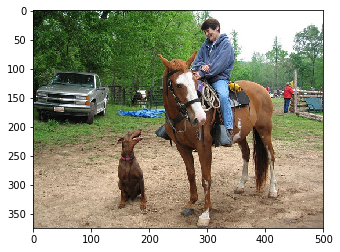

In [33]:
# 書き込み前画像の貼り付け
plt.imshow(cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB))
# 書き込み前画像の表示
plt.show()

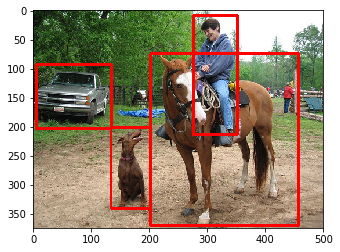

In [34]:
# 書き込み後画像の貼り付け
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# 書き込み後全体画像の表示
plt.show()